### Import that Pandas package.  We will use to hold the results of the queries, print Pandas tables, and print simple data visualizations.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
!pip install google-cloud-bigquery-storage
!pip install geopandas
!conda install -c plotly plotly

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py37h89c1867_2         3.1 MB  conda-forge
    openssl-1.1.1l             |       h7f98852_0         2.1 MB  conda-forge
    plotly-5.3.1               |             py_0         6.8 MB  plotly
    ------------------------------------------------------------
                                           Total:        12.0 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-5.3.1-py_0

The following packages will be UPDATED:

  conda                               4.10.3-py37h89c1867_0 --> 4.10.3-py37h89c1867_2
  openssl                                 1.1.1k-h7f98852_1 --> 1.1.1l-h7f98852_0


Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  E

### What are the 5 most popular trips that you would call "commuter trips"? 

In [50]:
%%bigquery commuter_type_1
WITH Input AS (
    SELECT trip_id, CONCAT(start_station_id, '-', end_station_id) AS route_id,
    CONCAT(start_station_name, '-', end_station_name) AS route_name,
    EXTRACT(TIME FROM start_date AT TIME ZONE "UTC") AS time
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE start_station_name LIKE '%Caltrain%' 
    AND subscriber_type = 'Subscriber'
    )
    SELECT COUNT(DISTINCT trip_id) AS route_count, route_name
    FROM Input
    WHERE time BETWEEN '07:45:00' AND '08:45:00'
    GROUP BY route_id, route_name
    ORDER BY route_count DESC
    LIMIT 1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.15s/rows]


In [51]:
%%bigquery commuter_type_2
WITH Input AS (
    SELECT trip_id, CONCAT(start_station_id, '-', end_station_id) AS route_id,
    CONCAT(start_station_name, '-', end_station_name) AS route_name,
    EXTRACT(TIME FROM start_date AT TIME ZONE "UTC") AS time
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE end_station_name LIKE '%Caltrain%' 
    AND subscriber_type = 'Subscriber'
    )
    SELECT COUNT(DISTINCT trip_id) AS route_count, route_name 
    FROM Input
    WHERE time BETWEEN '16:30:00' AND '18:00:00'
    GROUP BY route_id, route_name
    ORDER BY route_count DESC
    LIMIT 1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.12s/rows]


In [52]:
%%bigquery commuter_type_3
WITH Input AS (
    SELECT trip_id, CONCAT(start_station_id, '-', end_station_id) AS route_id,
    CONCAT(start_station_name, '-', end_station_name) AS route_name,
    EXTRACT(TIME FROM end_date AT TIME ZONE "UTC") AS end_time
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE end_station_id IN (41, 42, 45, 46, 48, 82)
    AND subscriber_type = 'Subscriber'
    )
    SELECT COUNT(DISTINCT trip_id) AS route_count, route_name 
    FROM Input
    WHERE end_time BETWEEN '08:30:00' AND '09:15:00'
    GROUP BY route_id, route_name
    ORDER BY route_count DESC
    LIMIT 1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.14s/rows]


In [53]:
%%bigquery commuter_type_4
WITH Input AS (
    SELECT trip_id, CONCAT(start_station_id, '-', end_station_id) AS route_id,
    CONCAT(start_station_name, '-', end_station_name) AS route_name,
    EXTRACT(TIME FROM start_date AT TIME ZONE "UTC") AS start_time
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE end_station_id IN (12, 16, 25, 35)
    AND subscriber_type = 'Subscriber'
    )
    SELECT COUNT(DISTINCT trip_id) AS route_count, route_name 
    FROM Input
    WHERE start_time BETWEEN '08:00:00' AND '09:30:00'
    GROUP BY route_id, route_name
    ORDER BY route_count DESC
    LIMIT 1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.21s/rows]


In [54]:
%%bigquery commuter_type_5
WITH Input AS (
    SELECT trip_id, CONCAT(start_station_id, '-', end_station_id) AS route_id,
    CONCAT(start_station_name, '-', end_station_name) AS route_name,
    EXTRACT(TIME FROM start_date AT TIME ZONE "UTC") AS start_time
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE start_station_id IN (12, 16, 25, 35)
    AND subscriber_type = 'Subscriber'
    )
    SELECT COUNT(DISTINCT trip_id) AS route_count, route_name 
    FROM Input
    WHERE start_time BETWEEN '15:00:00' AND '17:00:00'
    GROUP BY route_id, route_name
    ORDER BY route_count DESC
    LIMIT 1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.07s/rows]


In [90]:
pd.set_option('display.max_colwidth', None)
frames = [commuter_type_1, commuter_type_2, commuter_type_3, commuter_type_4, commuter_type_5]
trip_types = ['Morning Caltrain', 'Evening Caltrain', 'Morning F Dist', 'Morning Uni', 'Evening Uni']
t1 = pd.concat(frames)
t1['commute_type'] = trip_types
cols = ['commute_type', 'route_name', 'route_count']
t1 = t1[cols]
t1

,commute_type,route_name,route_count
0,Morning Caltrain,San Francisco Caltrain (Townsend at 4th)-Harry Bridges Plaza (Ferry Building),1795
0,Evening Caltrain,Embarcadero at Folsom-San Francisco Caltrain (Townsend at 4th),2739
0,Morning F Dist,Beale at Market-Commercial at Montgomery,615
0,Morning Uni,Santa Clara at Almaden-SJSU 4th at San Carlos,222
0,Evening Uni,Stanford in Redwood City-Redwood City Caltrain Station,303


We thought through logically what the 5 most popular "buckets" of commuter trip would be, and then from there performed data analysis to determine which was the most popular *route* for each bucket. Our thought process was as follows. 
Caltrain stations would be ideal morning start destinations (end destinations for evening trips) for commuters coming in from different parts of the city. To fitler the data further, we're assuming that commuters would have some kind of membership and that they would occur between 7:45AM-8:45AM for morning commutes and 4:30PM-6:00PM for evening commutes. 
Another type of commuter trip that we considered was trips that end in the financial district, because that particular area of the city has a lot of office buildings. Using the station map online, we determined the IDs of the 6 main stations in that area and filtered the data on those values. The last bucket we considered were university commute trips. To determine what trips this demographic is taking, we looked up the top 5 busiest stations near universities and found the most popular route for students getting to morning classes and leaving evening classes. This figure represents these route findings.

### What are your recommendations for offers (justify based on your findings)?

- Are monthly or annual memberships being taken advantage of my commuters?

```CREATE VIEW Project_1.commuter_trip_info AS  
SELECT trip_id, end_station_id, end_station_name, subscriber_type,  
EXTRACT(TIME FROM start_date AT  TIME ZONE "UTC") AS start_time, duration_sec  
FROM bigquery-public-data.san_francisco.bikeshare_trips;```

```CREATE VIEW Project_1.top_10_commuter_stations AS
SELECT end_station_id, end_station_name, COUNT (DISTINCT trip_id) AS num_trips
FROM alien-house-324100.Project_1.commuter_trip_info
WHERE start_time BETWEEN "07:30:00" AND "09:00:00"
AND duration_sec < 1500
GROUP BY end_station_id, end_station_name
ORDER BY num_trips DESC
LIMIT 10;```

```CREATE VIEW Project_1.commuter_trip_counts AS
SELECT end_station_id, COUNT (DISTINCT trip_id) as num_trips, subscriber_type
FROM bigquery-public-data.san_francisco.bikeshare_trips
WHERE time(CAST(start_date AS datetime)) BETWEEN "07:30:00" AND "09:00:00"
AND duration_sec < 1500
GROUP BY end_station_id, subscriber_type
ORDER BY end_station_id;```

In [56]:
%%bigquery t2
SELECT stations.end_station_id, 
counts.num_trips, counts.subscriber_type, 
FROM `alien-house-324100.Project_1.top_10_commuter_stations` AS stations
INNER JOIN `alien-house-324100.Project_1.commuter_trip_counts` AS counts
ON stations.end_station_id = counts.end_station_id

Downloading: 100%|██████████| 20/20 [00:00<00:00, 21.53rows/s]


In [67]:
v1 = pd.pivot_table(t2, values='num_trips', index=['end_station_id'],
                    columns=['subscriber_type'])
v1

subscriber_type,Customer,Subscriber
end_station_id,,
50,320,5923
51,75,6674
60,467,7324
61,170,10127
63,110,6145
65,225,9902
69,175,6493
70,305,13354
74,231,6606


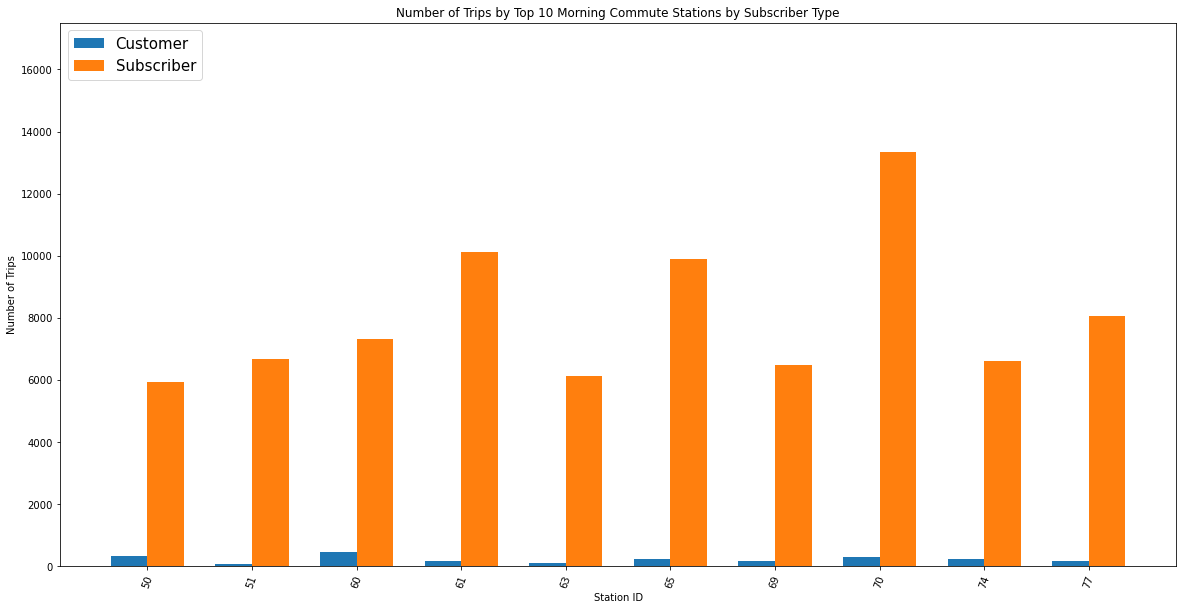

In [68]:
v1fig = plt.figure(figsize=(20, 10))
v1ax = v1fig.add_subplot(1,1,1)
bar1 = v1['Customer']
bar2 = v1['Subscriber']
x = np.arange(len(v1.index))  # the label locations
width = 0.35  # the width of the bars
rects1 = v1ax.bar(x - width/2, bar1, width, label='Customer')
rects2 = v1ax.bar(x + width/2, bar2, width, label='Subscriber')

v1ax.set_ylabel('Number of Trips')
v1ax.set_xlabel('Station ID')
v1ax.set_title('Number of Trips by Top 10 Morning Commute Stations by Subscriber Type')
v1ax.set_xticks(x)
v1ax.set_xticklabels(v1.index, rotation = 70, ha="center")
v1ax.set_ylim(0,17500)
v1ax.legend()
plt.legend(loc=2, prop={'size': 15})

From this output, we can see that the primary morning commuter stations are all primarily utilized by subscribers rather than customers. What this means is that those we are assuming to be corporate commuters do have memberships. Therefore, we do not need to funnel more money into promoting this option. However, we cannot tell from our data if they are signed up for corporate membership. If we had this data, we could determine if corporate memberships were being utilized and if they weren't we could advise members to look into whether their company offers that subsidy.

- Are pass customers typically riding for more than 30 min?

In [61]:
%%bigquery cust_rides
WITH Input AS (
    SELECT trip_id, duration_sec, 
    CASE WHEN duration_sec BETWEEN 0 AND 1799 THEN "< 30 Min"
    WHEN duration_sec BETWEEN 1800 AND 2699 THEN "30-45 Min"
    ELSE "> 45 Min"
    END AS trip_length
    FROM bigquery-public-data.san_francisco.bikeshare_trips
    WHERE subscriber_type = "Customer"
)
SELECT COUNT(DISTINCT trip_id) AS num_trips, trip_length
FROM Input
GROUP BY trip_length

Downloading: 100%|██████████| 3/3 [00:00<00:00,  3.34rows/s]


In [62]:
cust_rides

,num_trips,trip_length
0,10521,30-45 Min
1,31511,> 45 Min
2,94777,< 30 Min


We know that there are 136,809 customer ride trips total. 42,013 of them, 30% of the total, are greater than 30 minutes. The reason that this is important is because after pass rides are longer than 30 minutes, they're charged 3 more dollars off the bat, meaning they are paying half the cost of a monthly unlimited membership. My recommendation is to target these day pass riders that exceed their alloted 30 minutes and prompt them with an offer for the monthly membership and an explanation of the cost breakdown.

- Are most of the trips around universities taken by pass or membership holders?

In [63]:
%%bigquery uni_rides
SELECT COUNT (DISTINCT trip_id) AS num_trips, subscriber_type, zip_code
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE time(CAST(start_date AS datetime)) BETWEEN "09:00:00" AND "16:00:00"
AND duration_sec < 1500
AND zip_code IN ("94117", "94132", "94305", "94720",
"94112", "94613", "94618", "95053", "94105", "94704", "90240",
"94133", "94542", "95192", "95128")
GROUP BY subscriber_type, zip_code
ORDER BY zip_code

Downloading: 100%|██████████| 23/23 [00:01<00:00, 18.28rows/s]


In [71]:
v2 = pd.pivot_table(uni_rides, values='num_trips', index=['zip_code'],
                    columns=['subscriber_type'])
v2['Subscriber'] = v2['Subscriber'].fillna(0)
v2

subscriber_type,Customer,Subscriber
zip_code,,
90240,3.0,0.0
94105,617.0,21696.0
94112,101.0,2133.0
94117,377.0,5471.0
94132,55.0,1088.0
94133,452.0,13875.0
94305,27.0,217.0
94542,6.0,62.0
94618,60.0,1450.0


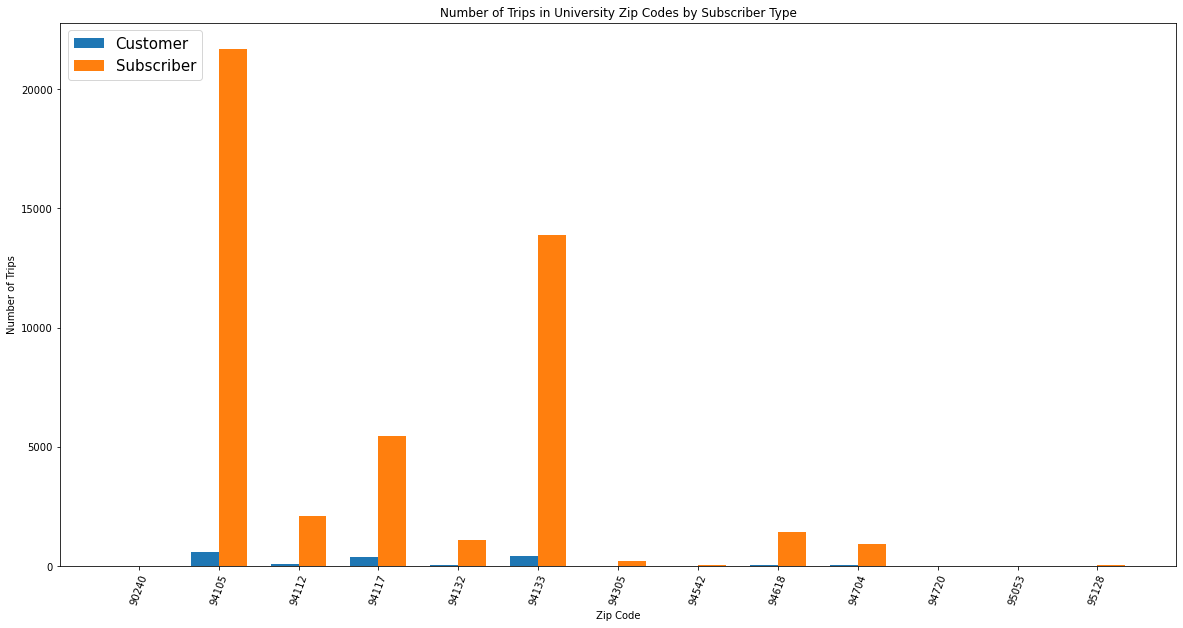

In [73]:
v2fig = plt.figure(figsize=(20, 10))
v2ax = v2fig.add_subplot(1,1,1)
v2bar1 = v2['Customer']
v2bar2 = v2['Subscriber']
v2x = np.arange(len(v2.index))  # the label locations
width = 0.35  # the width of the bars
v2rects1 = v2ax.bar(v2x - width/2, v2bar1, width, label='Customer')
v2rects2 = v2ax.bar(v2x + width/2, v2bar2, width, label='Subscriber')

v2ax.set_ylabel('Number of Trips')
v2ax.set_xlabel('Zip Code')
v2ax.set_title('Number of Trips in University Zip Codes by Subscriber Type')
v2ax.set_xticks(v2x)
v2ax.set_xticklabels(v2.index, rotation = 70, ha="center")
#v1ax.set_ylim(0,17500)
v2ax.legend()
plt.legend(loc=2, prop={'size': 15})

These selected zip codes were found from the Bay Wheels map to be those around the universities in network. The output of this query shows that for all of these zip codes, a large majority of the rides are coming from subcribers over one time customers, so memberships are probably being utlitized by these university students. However, I can't tell if they have used the monthly membership or an annual membership so we may want to get additional customer data to see if the annual relationship is being utilized. Secondly, we have no data to provide insight on if university discounts are being used. 

- Are members of communities in the lowest income areas taking advantage of our bikes and bike share for all offer

```CREATE VIEW Project_1.trips_by_zip AS
SELECT COUNT (DISTINCT trip_id) AS num_trips, zip_code
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE  zip_code BETWEEN "90000" AND "99999"
GROUP BY zip_code
ORDER BY num_trips DESC```

In [79]:
%%bigquery low_income
SELECT income.median_income, income.zip_code,zip.num_trips
FROM `alien-house-324100.Project_1.CA_Income` AS income
INNER JOIN `alien-house-324100.Project_1.trips_by_zip` AS zip
ON TRIM(income.zip_code) = TRIM(zip.zip_code)
ORDER BY median_income
LIMIT 15

Downloading: 100%|██████████| 15/15 [00:01<00:00, 11.79rows/s]


In [80]:
low_income

,median_income,zip_code,num_trips
0,10625,90089,16
1,11922,93721,2
2,12748,90021,7
3,15988,90058,3
4,16649,92401,3
5,17134,90014,17
6,19922,95225,2
7,20896,93258,1
8,21009,90017,46
9,21120,90013,18


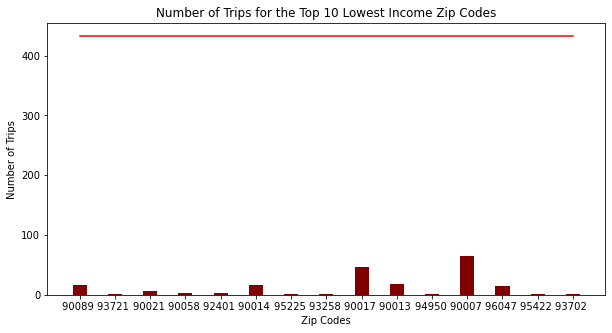

In [88]:
fig3 = plt.figure(figsize = (10, 5))
v3ax = fig3.add_subplot(1,1,1)

v3ax.bar(low_income['zip_code'], low_income['num_trips'], color ='maroon',
        width = 0.4)
v3ax.plot(low_income['zip_code'], [433 for i in range(0,len(low_income['zip_code']))], '-r')
v3ax.annotate("Average Number of Trips per Zip Code", xy = (90014, 433), 
            xytext = (90058, 350),
            arrowprops=dict(facecolor='black', shrink=0.05))
v3ax.set_xlabel("Zip Codes")
v3ax.set_ylabel("Number of Trips")
v3ax.set_title("Number of Trips for the Top 10 Lowest Income Zip Codes")
plt.show()

From part 2, we discovered that the average number of trips taken by users within a particular zip code was around 433. To determine if ridership was strong in low income zip codes, I pulled in the median household income by california zip code data and stored it in a table. Then I took the number of trips by zip code and compared them against the lowest income niehgborhoods. The average number of trips taken by a typical zip code is shown as the red line, and the final outputs shows that the fifteen lowest income zipcodes all have a number of rides far below the average, so on the mobile app we should promote bike access for all to people in these zip codes.  